<img src='dts.png' width='150' align='left'>
<img src='unud.png' width='120' align='right'>
<h1 display = inline style='text-align: center; color: #01174b; font-family: Montserrat;font-size:50px'>McDonald’s Nutritions</h1>

<h1 display = inline style='text-align: center;font-size:30px'>Introduction</h1>

Big company like McDonald's have their own way of consistently serving their flagship menus. The method used by persuading either the company's stakeholder or the restaurant's franchise owner to buy into their vision.

__Perusahaan besar seperti McDonald's mempunyai cara tersendiri untuk menyajikan menu-menu andalan mereka secara konsisten. Metode yang digunakan dengan membujuk baik _stakeholder_ perusahaan atau pemilik _franchise_ restoran untuk membeli visinya.__


<h1 display = inline style='text-align: center;font-size:30px'>Objective</h1>

**1.** How many calories does the average McDonald's value meal contain? 

<span class="mark"><i>Berapa banyak rata-rata kalori yang terkandung dalam **makanan** McDonald's?</i></span>

**2.** How much do beverages,like soda or coffee,contribute to the overall caloric intake?

<span class="mark"><i>Seberapa banyak .**minuman, seperti soda atau kopi.**, berkontribusi pada asupan kalori keseluruhan?</i></span>

**3.** Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?

<span class="mark"><i>Apakah **ayam panggang** yang dipesan daripada ayam **_crispy_** meningkatkan nilai gizi sandwich?</i></span>

**4.** What about ordering egg whites instead of whole eggs?

<span class="mark"><i>Bagaimana dengan memesan **putih telur** daripada **telur utuh**?</i></span>

**5.** What is the least number of items could you order from the menu to meet one day's nutritional requirements?

<span class="mark"><i>Berapa **jumlah makanan paling sedikit** yang dapat Anda pesan dari menu untuk **memenuhi kebutuhan gizi suatu hari**?</i></span>

<h1 display = inline style='text-align: center;font-size:30px'>Daftar Isi</h1>


<div style='background-color:white'>    
    
* [A. Data Preparation](#preparation)
* [B. Objective Answers](#answers)
* [C. Summary](#summary)
    
</div>

<div>
    <h1 style='font-size:30px'> A. Data Preparation </h1>
    <a class='anchor' id='preparation'></a>
</div>

## A.1 Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

## A.2 Data Gathering

### Reading data `menu.csv` from ( _<span class="mark">kaggle.com/mcdonalds/nutrition-facts</span>_ )

In [13]:
df = pd.read_csv('./dataset/menu.csv')
df.info()  # .info function generated for knowing the features and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

### Nutrition Column which is named "Daily Value"

In [14]:
listpercent = df.columns[df.columns.str.contains('%')].values
print(listpercent, "\n\nBanyak data:", len(listpercent))

['Total Fat (% Daily Value)' 'Saturated Fat (% Daily Value)'
 'Cholesterol (% Daily Value)' 'Sodium (% Daily Value)'
 'Carbohydrates (% Daily Value)' 'Dietary Fiber (% Daily Value)'
 'Vitamin A (% Daily Value)' 'Vitamin C (% Daily Value)'
 'Calcium (% Daily Value)' 'Iron (% Daily Value)'] 

Banyak data: 10


There are 10 data that match character `%` in which the _Daily Value_

### Nutrition Column which is named Non "Daily Value"

In [15]:
nonlistpercent = [
    'Calories', 'Calories from Fat', 'Trans Fat', 'Sugars', 'Protein'
]

## A.3 _Check_ the data whether it's Null or not

In [16]:
print(df.isnull().any())

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool


The data is completely **clean**, therefore, no need to refine it.

We mainly focused on data that provide `% daily intakes` since the bounds of percent is already clear, `[0, 100]`

## A.4 Split the data into Numerical and Categorical

Bertujuan untuk memastikan secara visual (tabel) jika ada fitur yang tidak sesuai

In [17]:
fitur_numerik = df.select_dtypes([np.number]).columns.tolist()
print('Jumlah Fitur Numerik : ', len(fitur_numerik))
print('yaitu :', fitur_numerik, "\n")
fitur_kategorik = df.select_dtypes(exclude=[np.number]).columns.tolist()
print('Jumlah Fitur Kategorik : ', len(fitur_kategorik))
print('yaitu :', fitur_kategorik)

Jumlah Fitur Numerik :  21
yaitu : ['Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)'] 

Jumlah Fitur Kategorik :  3
yaitu : ['Category', 'Item', 'Serving Size']


In [18]:
df[fitur_kategorik].head()

,Category,Item,Serving Size
0,Breakfast,Egg McMuffin,4.8 oz (136 g)
1,Breakfast,Egg White Delight,4.8 oz (135 g)
2,Breakfast,Sausage McMuffin,3.9 oz (111 g)
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g)
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g)


In [19]:
df[fitur_numerik].head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,31,10,4,17,3,17,10,0,25,15
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,30,10,4,17,3,18,6,0,25,8
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,30,10,4,17,2,21,6,0,25,10


<div>
    <h1 style='font-size:30px'> B. Objective Answers </h1>
    <a class='anchor' id='answers'></a>
</div>

## Objective 1
<span class="mark">How many calories does the average McDonald's value meal contain?</span> 

In [20]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


the average `Calories`, and `Calories from Fat` contained in the overall McDonalds meals is **368.27 cal** and **127.09 cal**, respectively

### And then we split the category both which is just Calories and the Calories from Fat

In [21]:
tdf = df[['Category', 'Calories']].groupby('Category').mean()
mean_calories = tdf.drop(['Beverages', 'Smoothies & Shakes',
                          'Coffee & Tea']).mean().values[0]
tdf = df[['Category', 'Calories from Fat']].groupby('Category').mean()
mean_calories_from_fat = tdf.drop(
    ['Beverages', 'Smoothies & Shakes', 'Coffee & Tea']).mean().values[0]
print('Calories :', mean_calories)
print('Calories from fat :', mean_calories_from_fat)

Calories : 385.25695292361956
Calories from fat : 163.8419820919821


We define `meals` as non beverages. Thus the average contributions of meals to the `Calories` and `Calories from Fat` are **385.26 cal** and **163.84 cal**.

We also would like to know each of `Category` contribution to the Calories

Now we need pie chart to clearly see the distribution, but first, here's the code snippet for simplify the making of pie chart

In [23]:
color = [
    '#00876c', '#57a18b', '#8cbcac', '#bed6ce', '#f1f1f1', '#f1c6c6',
    '#ec9c9d', '#e27076', '#d43d51'
]
def makepie(xx=None, data=None, colors=color, labels=None, explode=None):
    plt.pie(x=xx,
            data=data,
            colors=color,
            startangle=90,
            pctdistance=0.85,
            labels=labels,
            explode=explode,
            autopct='%1.1f%%')
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)




                    Calories
Category                    
Beef & Pork             7410
Beverages               3070
Breakfast              22120
Chicken & Fish         14930
Coffee & Tea           26970
Desserts                1555
Salads                  1620
Smoothies & Shakes     14880
Snacks & Sides          3195


Text(0.5, 1.0, 'Categories Contribution to Calories')

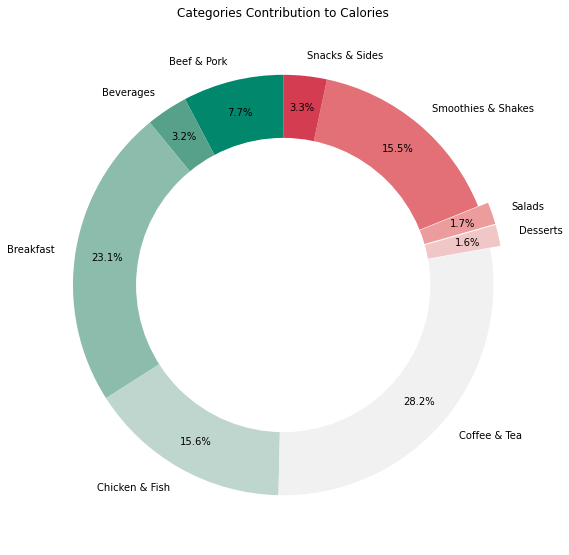

In [24]:
tdf = df[['Category', 'Calories']].groupby('Category').sum()
print(tdf)
fig = plt.figure(figsize=(8, 8))
makepie(xx='Calories',
        data=tdf,
        labels=tdf.index,
        explode=[0, 0, 0, 0, 0, .05, .05, 0, 0])
plt.tight_layout()
plt.title('Categories Contribution to Calories')

From the Pie Chart above, **Coffee & Tea contribute the most Calories**.

                    Calories from Fat
Category                             
Beef & Pork                      3370
Beverages                          20
Breakfast                       10455
Chicken & Fish                   6540
Coffee & Tea                     6755
Desserts                          450
Salads                            650
Smoothies & Shakes               3575
Snacks & Sides                   1230


Text(0.5, 1.0, 'Categories Contribution to Calories from Fat')

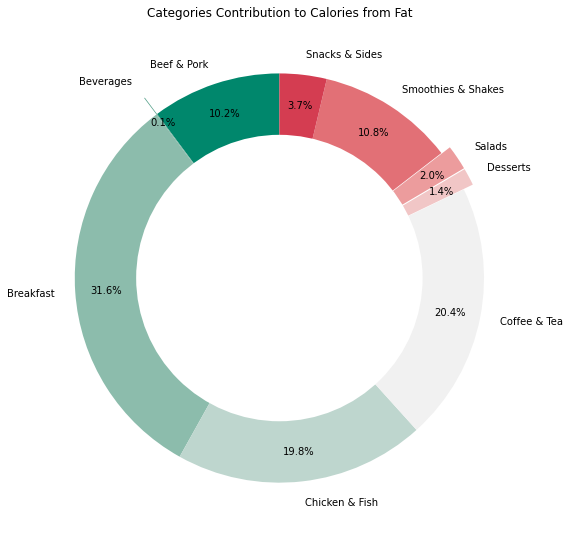

In [25]:
tdf = df[['Category', 'Calories from Fat']].groupby('Category').sum()
print(tdf)
fig = plt.figure(figsize=(8, 8))
makepie(xx='Calories from Fat',
        data=tdf,
        labels=tdf.index,
        explode=[0, 0.1, 0, 0, 0, 0.05, 0.05, 0, 0])
plt.tight_layout()
plt.title('Categories Contribution to Calories from Fat')

According to the pie chart above, the most contributions to Calories from Fat comes from **Breakfast**

# Objective 2
<span class="mark">How much do beverages,like soda or coffee,contribute to the overall caloric intake?</span>

We determine that Categories that belongs to Beverages area `Beverages`,`Smoothies & Shakes`,`Coffee & Tea`.
The others belongs to Meals.

Calories
           Calories
Category           
Beverages     44920
Meals         50830
Calories from Fat
           Calories from Fat
Category                    
Beverages              10350
Meals                  22695
Total Calories
           Calories from Fat
Category                    
Beverages              55270
Meals                  73525


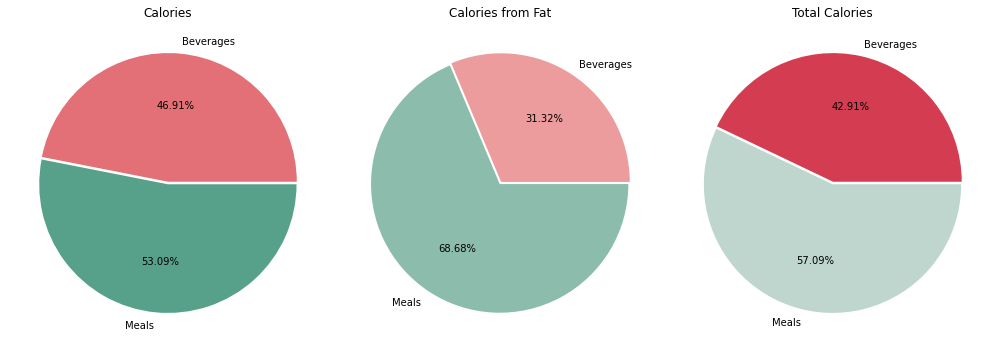

In [26]:
fig = plt.figure(figsize=(14, 14))

# ax1
tdf = df[['Category', 'Calories']].groupby('Category').sum()
total_bev = tdf.loc['Beverages'].values + tdf.loc[
    'Coffee & Tea'].values + tdf.loc['Smoothies & Shakes'].values
total_meals = tdf.sum().values - total_bev
meal_beverages = pd.DataFrame({
    'Category': ['Beverages', 'Meals'],
    'Calories': [total_bev[0], total_meals[0]],
})
meal_beverages = meal_beverages.set_index('Category')
print('Calories')
print(meal_beverages)
ax0 = fig.add_subplot(131)
ax0.pie(x='Calories',
        data=meal_beverages,
        labels=meal_beverages.index,
        explode=[0.01] * len(meal_beverages.index),
        autopct='%1.2f%%',
        colors=random.sample(color, 2))
ax0.set_title('Calories')

# ax2
tdf = df[['Category', 'Calories from Fat']].groupby('Category').sum()
total_bev = tdf.loc['Beverages'].values + tdf.loc[
    'Coffee & Tea'].values + tdf.loc['Smoothies & Shakes'].values
total_meals = tdf.sum().values - total_bev
meal_beverages = pd.DataFrame({
    'Category': ['Beverages', 'Meals'],
    'Calories from Fat': [total_bev[0], total_meals[0]],
})
meal_beverages = meal_beverages.set_index('Category')
print('Calories from Fat')
print(meal_beverages)
ax1 = fig.add_subplot(132)
ax1.pie(x='Calories from Fat',
        data=meal_beverages,
        labels=meal_beverages.index,
        explode=[0.01] * len(meal_beverages.index),
        autopct='%1.2f%%',
        colors=random.sample(color, 2))
ax1.set_title('Calories from Fat')

# ax3
tdf = df[['Category', 'Calories',
          'Calories from Fat']].groupby('Category').sum()
total_bev = tdf.sum(axis=1).loc['Beverages'] + tdf.sum(
    axis=1).loc['Coffee & Tea'] + tdf.sum(axis=1).loc['Smoothies & Shakes']
total_meals = tdf.sum(axis=1).sum() - total_bev
meal_beverages = pd.DataFrame({
    'Category': ['Beverages', 'Meals'],
    'Calories from Fat': [total_bev, total_meals],
})
meal_beverages = meal_beverages.set_index('Category')
print('Total Calories')
print(meal_beverages)
ax1 = fig.add_subplot(133)
ax1.pie(x='Calories from Fat',
        data=meal_beverages,
        labels=meal_beverages.index,
        explode=[0.01] * len(meal_beverages.index),
        autopct='%1.2f%%',
        colors=random.sample(color, 2))
ax1.set_title('Total Calories')
plt.tight_layout()

As we can see, Beverages contributes almost **46.91%, 31.32% and 42.91%** to the Calories, Calories from Fat and Total Calories, respectively

# Objective 3
<span class="mark">Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?</span>

In [27]:
df_item = df[['Category', 'Item']]
df_item
#print(df_item.to_string()) #for showing all data features (non skipping)

,Category,Item
0,Breakfast,Egg McMuffin
1,Breakfast,Egg White Delight
2,Breakfast,Sausage McMuffin
3,Breakfast,Sausage McMuffin with Egg
4,Breakfast,Sausage McMuffin with Egg Whites
...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small)
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium)
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack)
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium)


### Norlmalize data with MinMaxScaler

In [28]:
minmaxscaler = MinMaxScaler()
# normalized df
df_obj_3 = df
df_obj_3[nonlistpercent] = minmaxscaler.fit_transform(
    df_obj_3[nonlistpercent]) * 100
df_obj_3.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,19.588789,11.990203,14.165385,21.815385,6.007692,29.965385,8.153846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,22.986779,15.331565,13.426923,8.534615,20.973077,7.734615
std,12.780313,12.063765,14.205998,21.885199,5.321873,26.639209,17.165315,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,22.406091,13.133501,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.170213,1.886792,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,4.492188,4.597701,2.000000,0.000000,6.000000,0.000000
50%,18.085106,9.433962,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,13.671875,13.793103,8.000000,0.000000,20.000000,4.000000
75%,26.595745,18.867925,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,37.500000,21.839080,15.000000,4.000000,30.000000,15.000000
max,100.000000,100.000000,118.000000,182.000000,20.000000,102.000000,100.000000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,100.000000,100.000000,170.000000,240.000000,70.000000,40.000000


### Searching Data from Column 'Item' both Grilled Sandwiches and Crispy Sandwiches

In [29]:
df_grilled = df_obj_3[df_obj_3['Item'].str.lower().str.contains("grilled")]
df_crispy = df_obj_3[df_obj_3['Item'].str.lower().str.contains("crispy")]

df_grilled_sandwich = df_grilled[df_grilled['Item'].str.lower().str.contains(
    "sandwich")]
df_crispy_sandwich = df_crispy[df_crispy['Item'].str.lower().str.contains(
    "sandwich")]

df_crispy_sandwich.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,31.595745,23.773585,28.000000,43.000000,6.300000,31.800000,4.000000,67.00000,22.800000,1286.000000,...,55.60000,18.400000,3.000000,12.400000,8.593750,34.252874,5.60000,14.600000,21.000000,18.000000
std,6.745050,6.583527,7.778175,12.409674,3.154362,15.738488,8.944272,21.38925,7.596052,333.811324,...,7.98749,2.880972,0.707107,3.130495,2.531539,7.980025,2.19089,9.989995,8.215838,2.738613
min,22.872340,16.037736,19.000000,29.000000,3.000000,15.000000,0.000000,45.00000,14.000000,910.000000,...,43.00000,14.000000,2.000000,7.000000,5.468750,24.137931,4.00000,2.000000,15.000000,15.000000
25%,27.127660,18.867925,22.000000,33.000000,3.500000,18.000000,0.000000,45.00000,16.000000,990.000000,...,55.00000,18.000000,3.000000,13.000000,7.812500,27.586207,4.00000,6.000000,15.000000,15.000000
50%,32.446809,23.584906,28.000000,43.000000,6.000000,31.000000,0.000000,70.00000,24.000000,1400.000000,...,57.00000,19.000000,3.000000,13.000000,8.593750,36.781609,4.00000,20.000000,15.000000,20.000000
75%,35.638298,28.301887,33.000000,51.000000,9.000000,44.000000,0.000000,85.00000,29.000000,1410.000000,...,58.00000,19.000000,3.000000,14.000000,8.593750,41.379310,8.00000,20.000000,30.000000,20.000000
max,39.893617,32.075472,38.000000,59.000000,10.000000,51.000000,20.000000,90.00000,31.000000,1720.000000,...,65.00000,22.000000,4.000000,15.000000,12.500000,41.379310,8.00000,25.000000,30.000000,20.000000


In [30]:
df_grilled_sandwich.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.00,4.0,4.000000,4.000000,4.000000,4.0,4.000000,4.00
mean,25.265957,14.622642,17.250000,26.500000,5.375000,27.250000,0.0,92.500000,31.000000,1215.000000,...,45.000000,15.000000,3.25,13.5,7.812500,41.379310,6.000000,19.5,22.500000,18.75
std,5.380848,6.089596,6.849574,11.120552,2.688711,14.773287,0.0,20.207259,6.683313,303.589635,...,4.082483,1.414214,0.50,1.0,2.115635,6.502131,2.309401,9.0,8.660254,2.50
min,18.617021,7.547170,9.000000,13.000000,2.000000,9.000000,0.0,65.000000,22.000000,820.000000,...,42.000000,14.000000,3.00,13.0,6.250000,32.183908,4.000000,8.0,15.000000,15.00
25%,22.606383,11.084906,13.500000,20.500000,3.875000,18.750000,0.0,83.750000,28.000000,1127.500000,...,42.750000,14.000000,3.00,13.0,6.835938,39.080460,4.000000,17.0,15.000000,18.75
50%,25.531915,14.622642,17.500000,27.000000,5.750000,29.000000,0.0,97.500000,32.500000,1240.000000,...,43.500000,14.500000,3.00,13.0,7.031250,43.678161,6.000000,20.0,22.500000,20.00
75%,28.191489,18.160377,21.250000,33.000000,7.250000,37.500000,0.0,106.250000,35.500000,1327.500000,...,45.750000,15.500000,3.25,13.5,8.007812,45.977011,8.000000,22.5,30.000000,20.00
max,31.382979,21.698113,25.000000,39.000000,8.000000,42.000000,0.0,110.000000,37.000000,1560.000000,...,51.000000,17.000000,4.00,15.0,10.937500,45.977011,8.000000,30.0,30.000000,20.00


We are interested with the `Calories` and the `% daily value`.

In [31]:
interest = np.append(listpercent, nonlistpercent)
df_sandwich = pd.DataFrame({
    "Grilled": df_grilled_sandwich[interest].mean().values,
    "Crispy": df_crispy_sandwich[interest].mean().values,
    "Values": interest
})

In [32]:
df_sandwich

,Grilled,Crispy,Values
0,26.500000,43.000000,Total Fat (% Daily Value)
1,27.250000,31.800000,Saturated Fat (% Daily Value)
2,31.000000,22.800000,Cholesterol (% Daily Value)
3,50.500000,53.600000,Sodium (% Daily Value)
4,15.000000,18.400000,Carbohydrates (% Daily Value)
5,13.500000,12.400000,Dietary Fiber (% Daily Value)
6,6.000000,5.600000,Vitamin A (% Daily Value)
7,19.500000,14.600000,Vitamin C (% Daily Value)
8,22.500000,21.000000,Calcium (% Daily Value)
9,18.750000,18.000000,Iron (% Daily Value)


**Grilled Chicken** provides more **Cholesterol, Dietary Fiber, Vitamin A, Vitamin C, Calcium, Iron and Protein** <br> 
**Crispy** provides more **Total Fat, Saturated Fat, Sodium, Carbohydrates, Calories, Calories from Fat, Transfat, and Sugars**


### In order to simplify the code, here 2 of snippets code that can be used for plotting Bar Plot

In [33]:
def autolabel(rects):
    for rect in rects:
        height = round(rect.get_height(), 2)
        ax.annotate(
            '{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center',
            va='bottom')

In [34]:
def bar_plot(ax,
             data,
             colors=['c', 'm'],
             total_width=0.8,
             single_width=1,
             legend=True):
    # Number of bars per group
    n_bars = len(data)
    # The width of a single bar
    bar_width = total_width / n_bars
    bars = []
    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset,
                         y,
                         width=bar_width * single_width,
                         color=colors[i % len(colors)])
            autolabel(bar)
        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])
    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())

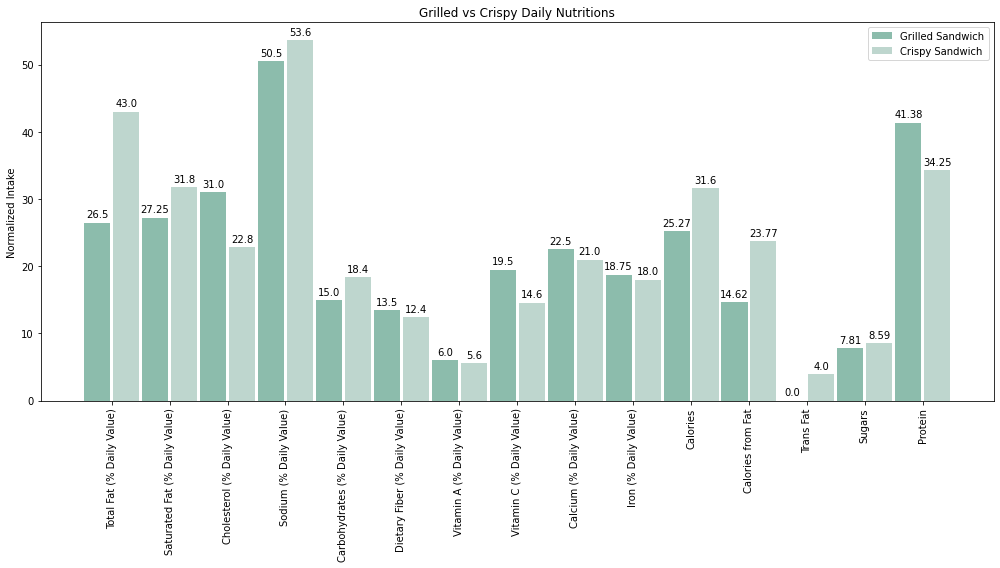

In [35]:
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(interest))  # the label locations
width = 0.35  # the width of the bars

data_sandwich = {
    "Grilled Sandwich": df_sandwich['Grilled'].values,
    "Crispy Sandwich": df_sandwich['Crispy'].values,
}
bar_plot(ax,
         data_sandwich,
         total_width=1,
         single_width=.9,
         colors=random.sample(color, 2))
ax.set_ylabel('Normalized Intake')
ax.set_title('Grilled vs Crispy Daily Nutritions')
ax.set_xticks(x)
ax.set_xticklabels(interest, rotation=90)

fig.tight_layout()

According to the result, we almost gain similar nutritions between Grilled and Crispy chicken. **The most significant difference (by visualization) can be seen on daily `Total Fat` intake, where Crispy chicken gives more Fat than Grilled**

# Objective 4
<span class="mark">What about ordering egg whites instead of whole eggs?</span>

In [36]:
df_obj_4 = df
df_obj_4[nonlistpercent] = minmaxscaler.fit_transform(
    df_obj_4[nonlistpercent]) * 100

In [37]:
df_eggs_whites = df_obj_4[df_obj_4['Item'].str.lower().str.contains("egg white")]
# if egg >2 then it offers Egg with additional Egg Whites with whole egg
df_eggs_whites = df_eggs_whites[df_eggs_whites['Item'].str.lower().str.count('egg') < 2]  

df_eggs_whole = df_obj_4[df_obj_4['Item'].str.lower().str.contains("egg")]
tdf = df_eggs_whole.merge(df_eggs_whites,
                          on=['Item'],
                          how='left',
                          indicator=True)
df_eggs_whole = df_eggs_whole[(tdf['_merge'] == 'left_only').to_list()]

We need to be very careful in filtering which one is serving the whole egg and which one only server egg whites. **We determine that if the Menu had contained Egg, therefore it classified as serving the whole egg (with additional egg whites if specified)**

In [38]:
print('Length of data :', df_eggs_whites['Item'].shape[0], 'data')
df_eggs_whites['Item']

Length of data : 8 data


1                                     Egg White Delight
4                      Sausage McMuffin with Egg Whites
14    Sausage Biscuit with Egg Whites (Regular Biscuit)
15      Sausage Biscuit with Egg Whites (Large Biscuit)
29      Big Breakfast with Egg Whites (Regular Biscuit)
30        Big Breakfast with Egg Whites (Large Biscuit)
33    Big Breakfast with Hotcakes and Egg Whites (Re...
34    Big Breakfast with Hotcakes and Egg Whites (La...
Name: Item, dtype: object

In [39]:
print('Length of data :', df_eggs_whole['Item'].shape[0], 'data')
df_eggs_whole['Item']

Length of data : 17 data


0                                          Egg McMuffin
3                             Sausage McMuffin with Egg
5                                  Steak & Egg McMuffin
6         Bacon, Egg & Cheese Biscuit (Regular Biscuit)
7           Bacon, Egg & Cheese Biscuit (Large Biscuit)
8     Bacon, Egg & Cheese Biscuit with Egg Whites (R...
9     Bacon, Egg & Cheese Biscuit with Egg Whites (L...
12           Sausage Biscuit with Egg (Regular Biscuit)
13             Sausage Biscuit with Egg (Large Biscuit)
18                Steak & Egg Biscuit (Regular Biscuit)
19                       Bacon, Egg & Cheese McGriddles
20       Bacon, Egg & Cheese McGriddles with Egg Whites
22                     Sausage, Egg & Cheese McGriddles
23     Sausage, Egg & Cheese McGriddles with Egg Whites
24                            Bacon, Egg & Cheese Bagel
25            Bacon, Egg & Cheese Bagel with Egg Whites
26                            Steak, Egg & Cheese Bagel
Name: Item, dtype: object

In [40]:
interest = np.append(listpercent, nonlistpercent)
df_eggs = pd.DataFrame({
    "Whole": df_eggs_whole[interest].mean().values,
    "Whites": df_eggs_whites[interest].mean().values,
    "Values": interest
})
df_eggs[df_eggs['Whole'] < df_eggs['Whites']]

,Whole,Whites,Values
0,40.941176,50.625000,Total Fat (% Daily Value)
1,55.823529,60.500000,Saturated Fat (% Daily Value)
3,52.764706,61.875000,Sodium (% Daily Value)
4,14.176471,19.250000,Carbohydrates (% Daily Value)
5,10.941176,16.375000,Dietary Fiber (% Daily Value)
9,16.764706,17.250000,Iron (% Daily Value)
10,26.376721,33.244681,Calories
11,22.475028,27.948113,Calories from Fat
14,25.422583,28.304598,Protein


Consuming item with **Whole Egg** provides more **Cholesterol, Vitamin A, Vitamin C, Calcium, Trans Fat and Sugars** <br>
Consuming item with **Egg Whites Only** provides more **Total Fat, Saturated Fat, Sodium, Carbohydrates, Dietary Fiber, Iron, Calories, Calories from Fat and Protein**

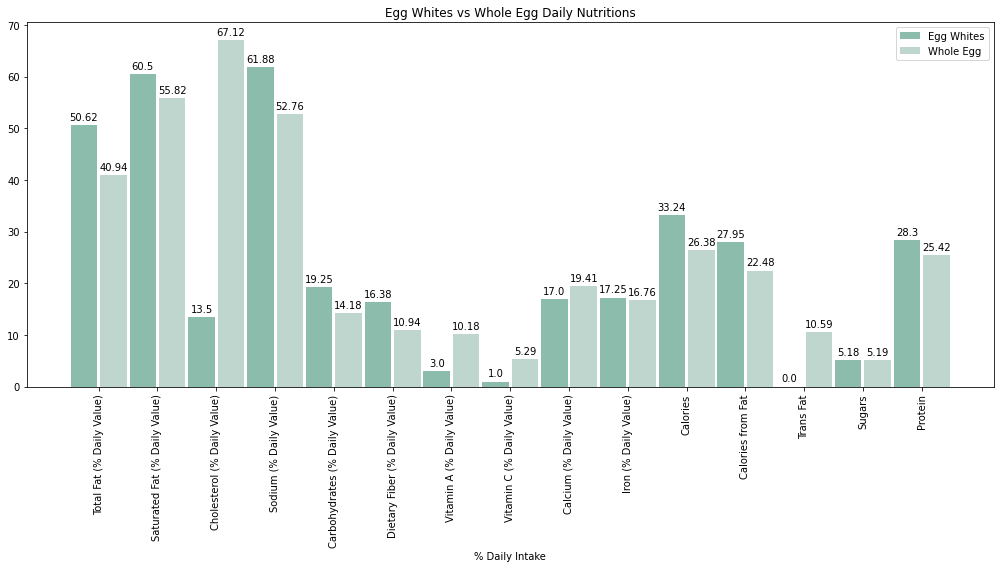

In [41]:
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(interest))  # the label locations
width = 0.5  # the width of the bars

data_egg = {
    "Egg Whites": df_eggs['Whites'].values,
    "Whole Egg": df_eggs['Whole'].values,
}
bar_plot(ax,
         data_egg,
         total_width=1,
         single_width=.9,
         colors=random.sample(color, 2))
ax.set_xlabel('% Daily Intake')
ax.set_title('Egg Whites vs Whole Egg Daily Nutritions')
ax.set_xticks(x)
ax.set_xticklabels(interest, rotation=90)

fig.tight_layout()

According to the result, we gain so much `Cholesterol` by consuming the `Whole Egg`

# Objective 5: Solved using Linear Programming Optimization
What is the least number of items could you order from the menu to meet one day's nutritional requirements?

Luckily, the dataset included normalized % daily value for each nutrition. Therefore, we only consider Features with % values, since the bound is clear [0%,100%]

In [42]:
df_opt = df[listpercent]
df_opt

,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,20,25,87,31,10,17,10,0,25,15
1,12,15,8,32,10,17,6,0,25,8
2,35,42,15,33,10,17,8,0,25,10
3,43,52,95,36,10,17,15,0,30,15
4,35,42,16,37,10,17,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...
255,26,44,14,12,27,4,15,0,40,8
256,35,58,19,16,35,5,20,0,50,10
257,17,29,9,8,18,2,10,0,25,6
258,50,76,20,17,38,9,20,0,60,6


we want to perform optimization on this data. <br>
Nice tutorial [here](https://realpython.com/linear-programming-python/)

Mathematical Definition 
$$X \in Item(s)$$
$$\theta \in Nutrition(s)$$
<br>
The **Objective 5** tried to solve _least_, therefore we would minimize $X$ <br>
$$\underset{Z}{\text{minimize}} = \sum{X}$$
Subject to:
$$\theta^{T}X\geq100$$
<br>
As mentioned in the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html) that the subject always less-equal, thus the subject become
$$-\theta^{T}X\leq-100$$
<br>
<br>

**COMPLETE EQUATION** <br>
Solve:
$$\underset{Z}{\text{minimize}} = \sum{X}$$
Subject to:
$$-\theta^{T}X\leq-100$$
$$0\leq X \leq B$$

In [43]:
x, teta = df_opt.shape
obj = np.full(x, 1)

# data
lhs_eq = -1 * df_opt.to_numpy().transpose()
rhs_eq = np.full(teta, -100)

# maximize fat and cholesterol
lhs_eq[0, :] *= -1  # total fat
lhs_eq[1, :] *= -1  # saturated fat
lhs_eq[2, :] *= -1  # cholesterol

rhs_eq[0] *= -1
rhs_eq[1] *= -1
rhs_eq[2] *= -1

# breakfast, Beef&pork, chikenfish, salads, snacksides,desserts,beverages,coffee&tea,smoothies&shakes
# min-max setting
# 1  == <=
# -1 == >=
minmaxset = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])

amount_per_category = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10
                                ]) * minmaxset

category_range = [42, 57, 84, 90, 103, 110, 137, 232,
                  260]  # range of each category
for i, a in enumerate(category_range):
    t = np.zeros(shape=(1, x))
    if (i == 0):
        t[0][0:a] = minmaxset[i]
    else:
        t[0][category_range[i - 1]:a] = minmaxset[i]
    lhs_eq = np.append(lhs_eq, t, axis=0)

rhs_eq = np.append(rhs_eq, amount_per_category)

print(lhs_eq.shape)
print(rhs_eq.shape)

# bounds
B = 2
bnd = []
for a in range(x):
    bnd.append((0, B))

(19, 260)
(19,)


The above `code` is the implementation to the complete equation. $B$ is customizable, it represent of the maximum amount of intake per item.

In [44]:
from scipy.optimize import linprog

opt = linprog(c=obj, A_ub=lhs_eq, b_ub=rhs_eq, bounds=bnd, method='simplex')
opt.status

0

In [45]:
interest = np.append(['Item'], listpercent)
df_res = df[(opt.x) > 0][interest].set_index('Item').transpose() * np.round(
    opt.x[opt.x > 0])

Choose the following menu to fullfill your daily nutritions without worrying on Total Fat, Saturated Fat and, Cholesterol.

In [46]:
df_portions = pd.DataFrame({
    'Category': df['Category'][np.round(opt.x) > 0].values,
    'Item': df['Item'][np.round(opt.x) > 0].values,
    'Portions': np.round(opt.x[np.round(opt.x) > 0])
})
pd.options.display.max_colwidth = 100
df_portions

,Category,Item,Portions
0,Breakfast,Fruit & Maple Oatmeal,1.0
1,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,2.0
2,Chicken & Fish,Premium McWrap Chicken Sweet Chili (Grilled Chicken),1.0
3,Salads,Premium Southwest Salad with Grilled Chicken,1.0


Here's the total intake for your day:

Text(0.5, 1.0, '% Daily Nutritions')

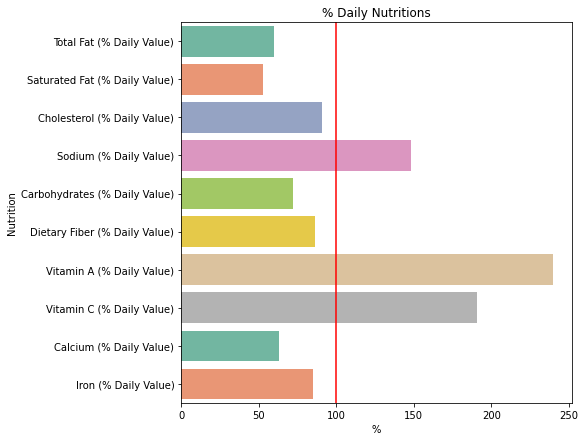

In [47]:
daily = pd.DataFrame(df_res.transpose().sum()).reset_index()
daily.columns = ['Nutrition', '%']

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax = sns.barplot(x='%', y='Nutrition', data=daily, palette="Set2")
ax.axvline(100, color='red')
ax.set_title('% Daily Nutritions')

# Wrapping Up Objective 5

In [48]:
def computelp(minmaxset, limit_category, B):
    x, teta = df_opt.shape
    obj = np.full(x, 1)

    # data
    lhs_eq = -1 * df_opt.to_numpy().transpose()
    rhs_eq = np.full(teta, -100)

    # maximize fat and cholesterol
    lhs_eq[0, :] *= -1  # total fat
    lhs_eq[1, :] *= -1  # saturated fat
    lhs_eq[2, :] *= -1  # cholesterol

    rhs_eq[0] *= -1
    rhs_eq[1] *= -1
    rhs_eq[2] *= -1

    # breakfast, Beef&pork, chikenfish, salads, snacksides,desserts,beverages,coffee&tea,smoothies&shakes
    amount_per_category = limit_category * minmaxset

    category_range = [42, 57, 84, 90, 103, 110, 137, 232,
                      260]  # range of each category
    for i, a in enumerate(category_range):
        t = np.zeros(shape=(1, x))
        if (i == 0):
            t[0][0:a] = minmaxset[i]
        else:
            t[0][category_range[i - 1]:a] = minmaxset[i]
        lhs_eq = np.append(lhs_eq, t, axis=0)

    rhs_eq = np.append(rhs_eq, amount_per_category)

    # bounds
    bnd = []
    for a in range(x):
        bnd.append((0, B))

    # Modeler
    from scipy.optimize import linprog

    opt = linprog(c=obj,
                  A_ub=lhs_eq,
                  b_ub=rhs_eq,
                  bounds=bnd,
                  method='simplex')
    if (opt.status == 0):
        df_portions = pd.DataFrame({
            'Category':
            df['Category'][np.round(opt.x) > 0].values,
            'Item':
            df['Item'][np.round(opt.x) > 0].values,
            'Portions':
            np.round(opt.x[np.round(opt.x) > 0])
        })
        print(df_portions)
        print("Total: %d items" % (df_portions['Portions'].sum()))

        interest = np.append(['Item'], listpercent)
        df_res = df[(opt.x) > 0][interest].set_index(
            'Item').transpose() * np.round(opt.x[opt.x > 0])
        daily = pd.DataFrame(df_res.transpose().sum()).reset_index()
        daily.columns = ['Nutrition', '%']

        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(111)
        ax = sns.barplot(x='%', y='Nutrition', data=daily, palette="Set2")
        ax.axvline(100, color='red')
        ax.set_title('% Daily Nutritions')

        # set minimum value
        te = daily.set_index('Nutrition')
        te.drop([
            'Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)',
            'Cholesterol (% Daily Value)'
        ],
                axis=0,
                inplace=True)
        print("Nutrition > %d percent" % (te['%'].min()))
    else:
        print('Failed')

Specify each variable for constraint.

         Category                                          Item  Portions
0       Breakfast                         Fruit & Maple Oatmeal       1.0
1  Chicken & Fish      Premium Grilled Chicken Classic Sandwich       3.0
2          Salads  Premium Southwest Salad with Grilled Chicken       1.0
Total: 5 items
Nutrition > 70 percent


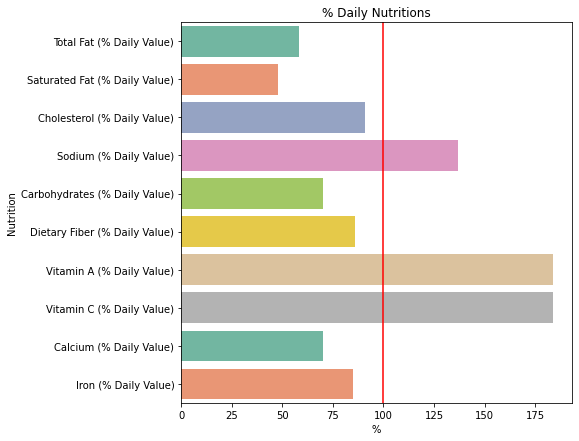

In [49]:
# set value to ('<=',0) for not taking on the category

# Constraint per Category
breakfast = ('<=', 5)
beefpork = ('<=', 5)
chickenfish = ('<=', 5)
salads = ('<=', 5)
snackssides = ('<=', 5)  #
desserts = ('<=', 5)
beverages = ('<=', 5)
coffeetea = ('<=', 5)
smoothiesshakes = ('<=', 5)

# max per Items
B = 5

# parser
minmaxsetting = np.array([
    breakfast[0], beefpork[0], chickenfish[0], salads[0], snackssides[0],
    desserts[0], beverages[0], coffeetea[0], smoothiesshakes[0]
])
minmaxsetting[minmaxsetting == '>='] = -1
minmaxsetting[minmaxsetting == '<='] = 1
minmaxsetting = minmaxsetting.astype(int)

limiter = np.array([
    breakfast[1], beefpork[1], chickenfish[1], salads[1], snackssides[1],
    desserts[1], beverages[1], coffeetea[1], smoothiesshakes[1]
])
# modeler
computelp(minmaxsetting, limiter, B)

<div>
    <h1 style='font-size:30px'> C. Summary </h1>
    <a class='anchor' id='summary'></a>
</div>

* Objective 1 : 
    * Q: How many calories does the average McDonald's value `meal` contain? 
    * A: The McDonalds menus contains **268.27 cal** and **127.09 cal** of Calories and Calories from Fat, respectively. And also, we define `meals` as non beverages. Thus the average contributions of meals to the `Calories` and `Calories from Fat` are **385.26 cal** and **163.84 cal** (**Total: 549.1 cal**).
* Objective 2 :
    * Q: How much do beverages,like soda or coffee,contribute to the overall caloric intake?
    * A: Beverages contributes almost **46.91%**, **31.32%** and **42.91%** to the Calories, Calories from Fat and Total Calories, respectively
* Objective 3 :
    * Q: Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?
    * A: **Grilled Chicken** provides more **Cholesterol, Dietary Fiber, Vitamin A, Vitamin C, Calcium, Iron and Protein**. Meanwhile, **Crispy** provides more **Total Fat, Saturated Fat, Sodium, Carbohydrates, Calories, Calories from Fat, Transfat, and Sugars**
* Objective 4 : 
    * Q: What about ordering egg whites instead of whole eggs? 
    * A: Consuming item with **Whole Egg** provides more **Cholesterol, Vitamin A, Vitamin C, Calcium, Trans Fat and Sugars**. Meanwhile, Consuming item with **Egg Whites Only** provides more **Total Fat, Saturated Fat, Sodium, Carbohydrates, Dietary Fiber, Iron, Calories, Calories from Fat and Protein**
* Objective 5 :
    * Q: What is the least number of items could you order from the menu to meet one day's nutritional requirements?
    * A: In case every Items treated in the same way, we can request **A portion of Fruit & Maple Oatmeal for breakfast, 3 portion of Premium Grilled Chicken Classic Sandwich for Lunch, Dinner, Snacks and  A portion of Premium Southwest Salad with Grilled Chicken as complimentary** in total of 5 items, to fullfill almost **> 70%** of daily nutritions without worrying on excessive Fat and Cholesterol 

<div style='background-color:black'>
    <h1> end</h1>
</div>

(c)

Fasilitator:
1. Gusti Made Arya Sasmita, ST. MT
2. Widyadi Setiawan, ST., MT.

Peserta:
1. Cokorda Gede Sedana Yoga
2. I Gede Eka Sulistyawan

Fresh Graduate Academy <br>
Universitas Udayana <br>
Digitalent Scholarship 2020 <br>